In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def slow_dft(f, inv=False):
    N = len(f)
    theta = 2 * np.pi * (1 if inv else -1) / N
    W = np.ones((N, N), dtype=np.complex128)

    for i in range(1, N):
        for j in range(1, i):
            W[i, j] = np.exp(1j * i * j * theta)
            W[j, i] = W[i, j]

    F = np.dot(W, f)

    if inv:
        F /= N

    return F

# Array lengths
lengths = np.arange(100, 2001, 100)

# Store results
dft_results = []
inv_dft_results = []

# Compute DFT and inverse DFT for each length
for length in lengths:
    # Generate input array
    f = np.arange(1, length + 1)

    # Compute DFT
    F = slow_dft(f)
    dft_results.append(F)

    # Compute inverse DFT
    f_inv = slow_dft(F, inv=True)
    inv_dft_results.append(f_inv)

In [3]:
# Example usage
f = np.array([1, 2, 3, 4, 5])
F = slow_dft(f)
print("DFT of f:", F)

# Inverse DFT
f_inv = slow_dft(F, inv=True)
print("Inverse DFT of F:", f_inv)

DFT of f: [15.        +0.j         -1.11803399+5.34306783j -0.42705098-2.04087031j
  0.26393202-4.61652531j  0.95491503+1.31432778j]
Inverse DFT of F: [2.93475242-1.24344979e-15j 2.80901699+1.96416717e+00j
 3.3618034 -1.96416717e+00j 3.9145898 -1.96416717e+00j
 4.46737621+1.96416717e+00j]


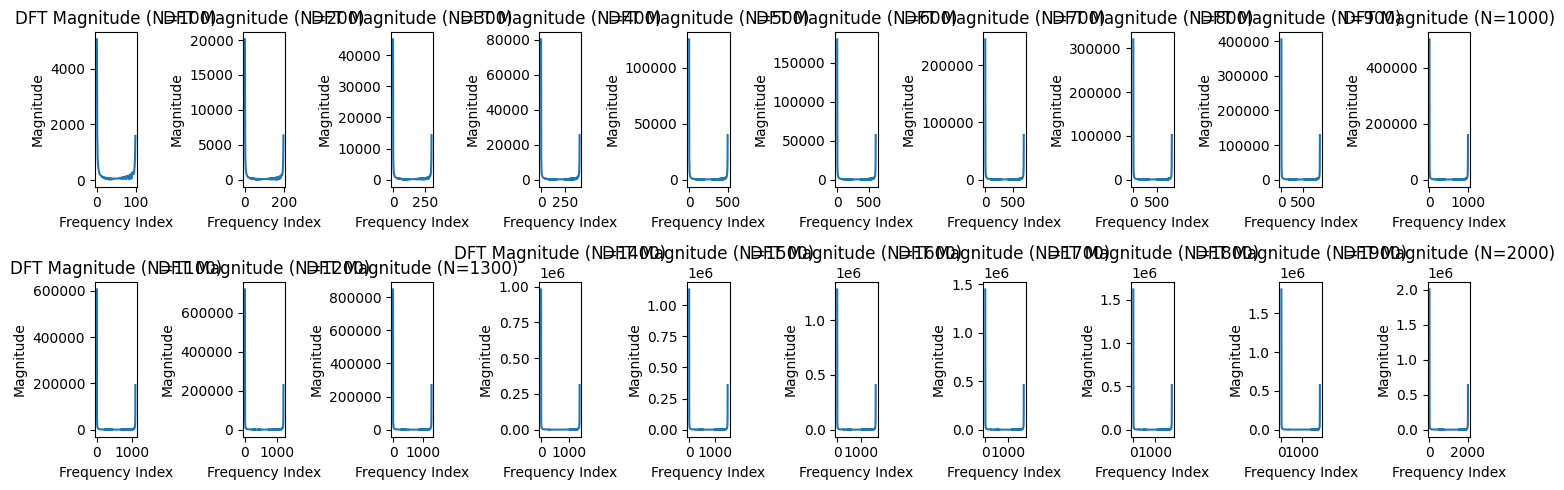

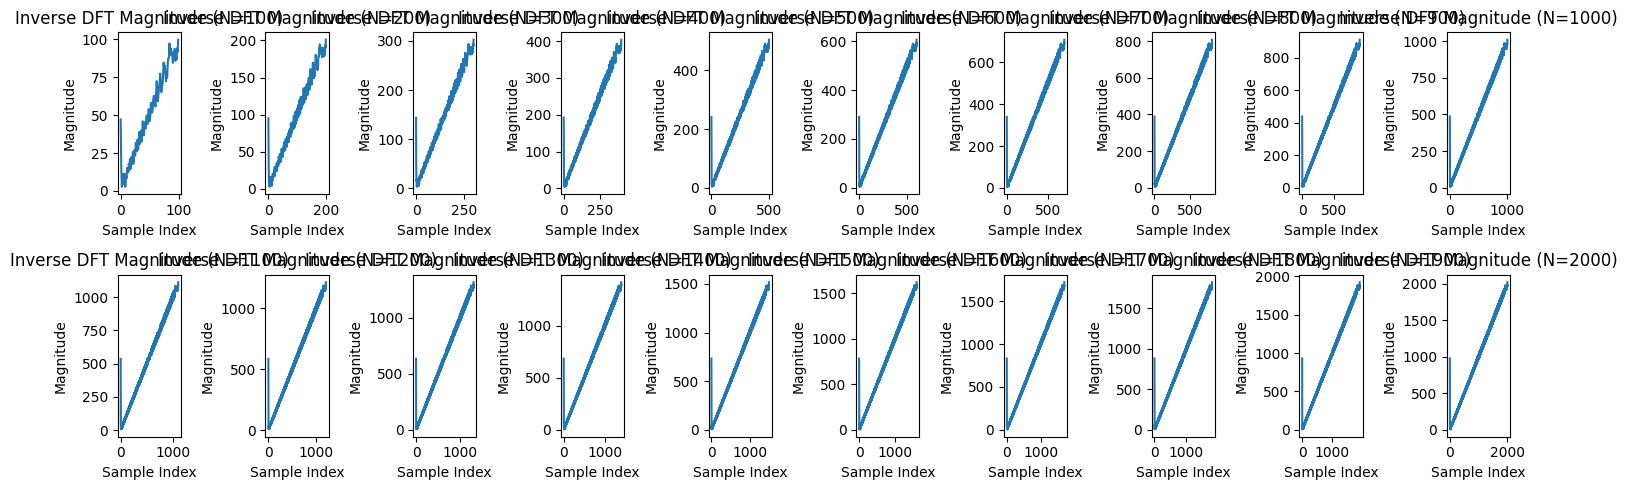

In [10]:
# Plot the magnitude of DFT for each length
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, length in enumerate(lengths):
    plt.plot(np.abs(dft_results[i]), label=f"N={length}")
plt.title("Magnitude of DFT")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.legend()

# Plot the magnitude of inverse DFT for each length
plt.subplot(1, 2, 2)
for i, length in enumerate(lengths):
    plt.plot(np.abs(inv_dft_results[i]), label=f"N={length}")
plt.title("Magnitude of Inverse DFT")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()